# Plot of sun with all observations

In [1]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
# import numpy as np
# import matplotlib.pyplot as plt
# import use_nessi as un
import use_nessi2 as un2

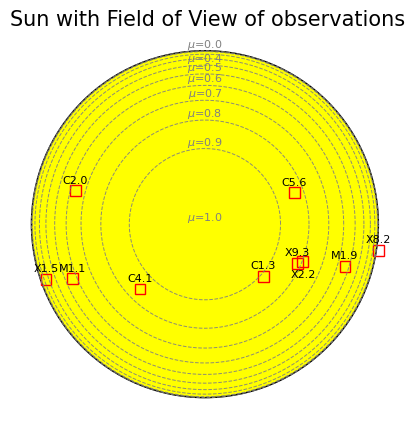

In [2]:
sr = solar_radius = 959.63
centers = [(513, -216) , (542, -208), (-716.9, 186.2) ,(323.4, -287.9), (496, 175),  (-879, -305), 
           (775, -233), (-732, -302),  ( -359,  -359), (959, -144) ]
flarelabels = ["X9.3", "\n\n\n\nX2.2", "C2.0", "C1.3", "C5.6", "X1.5", "M1.9", "M1.1", "C4.1", "X8.2"]
angles =    []

# Create the sun plot
un2.create_sun_plot(centers, flarelabels)

In [6]:
# \begin{table*}[ht]
#     \centering
#     \caption{Flare Information}
#     \label{tab:flare_info} 
#     \begin{tabular}{llllllllll}
#         \toprule
#         Year & NOAA & Class & Start/Stop/Peak & SST Start/Stop & Overlap & (X, Y) & $\mu$ & Lines & Cad [s] \\
#         \midrule
#         2017-09-06 &  12673 & X9.3 &11:53/12:10/12:01 &11:56/12:52 & appr 40\% & (513'', -216'') & 0.815 & \CaIR & 15.0 \\ & & & & & & & & \Halpha & 15.0  \\ & & & & & & & & \CaK & 6.6 \\
        
#         2017-09-06 & 12673 & X2.2 & 08:57/09:17/09:09 &09:04/09:54 & appr 60\% & (542'', -208'') & 0.803 & \CaIR & 15.0 \\ & & & & & & & & \Halpha & 15.0 \\ & & & & & & & & \CaK & 6.6 \\ 
        
#         2014-06-10 & 13052\footnote{To be noted SPoCA 13052} & X1.5& 12:36/12:52/13:03 &12:40/12:58&100\% & (-879'', -305'') & 0.139& \Halpha & 4.0\\     
        
#         2015-09-27 & 12423 & M1.9 & 10:20/10:40/10:46 &10:35/10:59 & appr 40\% & (775'', -233'') & 0.502 & \CaIR & todo \\ & & & & & & & & \Halpha & todo \\
        
#         2014-09-06& 12157 & M1.1 & 16:50/17:22/17:09 & 15:27/17:27 & todo & (-732'', -302'') & 0.560 & \Halpha & 11.6\\& & & & & & & & \CaIR & 11.6  \\& & & & & & & & \Fe{6302}\footnote{This observation has no spectral data so we exclude it from further investigation.} & 11.6  \\
        
#         2015-06-24 &  12371 & C5.6&	15:12/15:40/15:29 &14:49/16:45 &  appr 100\% & (496'', 175'') & todo  & \CaIR & todo \\ & & & & & & & & \Halpha & todo  \\

#         2017-09-10 & 12673 & C1.7 & 16:20/16:32/16:40 & 16:26/16:29 & appr 80\% & (959'', -144'') & 0 & \CaK & 19.7\\  & & & &  16:25/17:49 & & & & \Hbeta  & 21.5\\  & & & & 16:23/18/32  & & & & \CaIR  & 46.1\\  
        

        
#         2011-08-06 &  	11267 & C4.1 &08:37/08:51/08:47 &09:00/09:37 & appr 50\% & ( -359'',  -359'') & 0.848 & \Fe{6302} & 28.3 \\ & & & & & & & & \Fe{5576}  & 28.3\\
        
#         2019-05-06 &12740 & C2.0  &08:41/08:51/08:47 &08:34/09:33& appr 70\%&(-716.9'', 186.2'')& 0.638 & \Fe{6173} & 20.9 \\ & & & & & & & & \CaIR  & 20.9\\ & & & & & & & & \CaK & 7.8 \\ 
        
#         2013-06-30 & 11778 & C1.3 &09:11/09:27/09:18 &09:16/10:17&100\%&(323.4'', -287.9'')& 0.892 & \Halpha        & 7.3  \\
#         \bottomrule
#     \end{tabular}
# \end{table*} 

In [7]:
# plot of distribution
import numpy as np

# density in r
def rho_r(r, phi):
    if r <= np.sin(phi):
        t =  np.pi/2 * r 
    elif r <=1:
        t = np.arcsin(1/r * np.sin(phi))*r
    else:
        raise ValueError(f"r={r} is not inbetween 0 and 1. ")
    n = phi * np.pi + np.sin(phi)*np.cos(phi)/2
    return t / n

def rho_mu(mu, phi):
    r = np.arccos(mu)/np.pi*2
    return rho_r(r, phi) * np.sin(r)


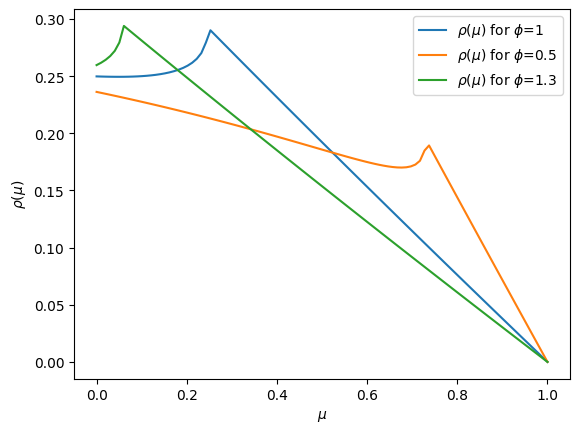

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
phi = 1
mus = np.linspace(0, 1, 100)
rhos = [rho_mu(mu, phi) for mu in mus]
ax.plot(mus, rhos, label=r"$\rho(\mu)$ for $\phi$=1")
phi = 0.5
rhos = [rho_mu(mu, phi) for mu in mus]
ax.plot(mus, rhos, label=r"$\rho(\mu)$ for $\phi$=0.5")
phi = 1.3
rhos = [rho_mu(mu, phi) for mu in mus]
ax.plot(mus, rhos, label=r"$\rho(\mu)$ for $\phi$=1.3")
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r'$\rho(\mu)$')
ax.legend()
plt.show()

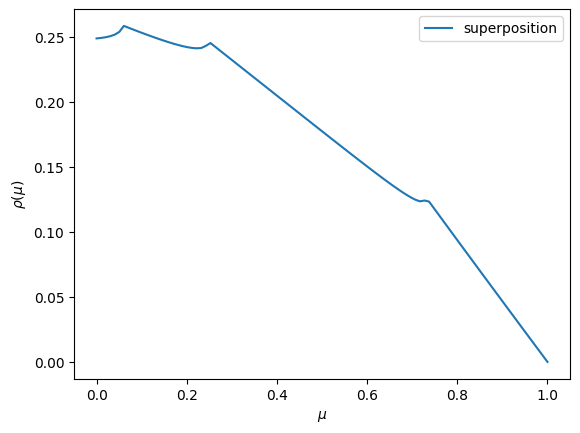

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
phi = 1
mus = np.linspace(0, 1, 100)
rhos1 = np.array([rho_mu(mu, phi) for mu in mus])
phi = 0.5
rhos2 = np.array([rho_mu(mu, phi) for mu in mus])
phi = 1.3
rhos3 = np.array([rho_mu(mu, phi) for mu in mus])
ax.plot(mus, 1/3*(rhos1+rhos2+rhos3), label="superposition")
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r'$\rho(\mu)$')
ax.legend()
plt.show()

Text(0.5, 1.0, '$\\rho(h)$')

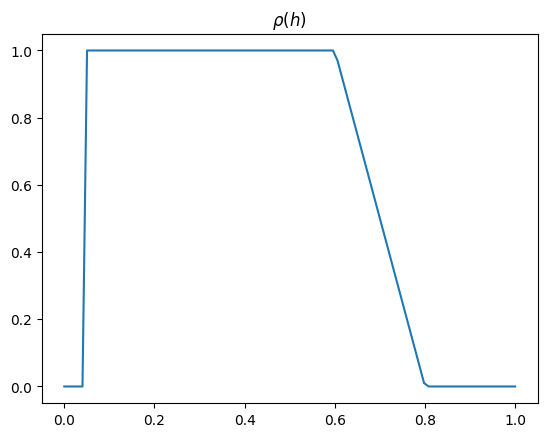

In [10]:
def rho_exp_h(h):
    """kinda experimenta M-shape density function"""
    a = 0.05
    b = 0.6
    c = 0.8
    
    # 1 between a and b, there after going down linear to 0 at c else 0
    
    return np.where(h > a, 1, 0) * np.where(h < b, 1, 0) + np.where(h > b, -(h-c)/(c-b), 0) * np.where(h < c, 1, 0)

h = np.linspace(0,1, 100)
plt.plot(h, rho_exp_h(h))
plt.title(r'$\rho(h)$')
    

In [11]:
from scipy.integrate import quad

def get_mu_density(rho_h):
    f2 = lambda h: rho_h(h) * (1-(h)**2)**0.5
    n = quad(f2, 0, 1)[0]
    
    def mu_dens(mu):
        r = np.arccos(mu)/np.pi*2
        f1 = lambda h: rho_h(h) / (1-(h/r)**2)**0.5
        t = quad(f1, 0, r)[0]

        return t/n * np.sin(r)
    
    return mu_dens

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_14316\3935298017.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  t = quad(f1, 0, r)[0]
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_14316\3935298017.py:10: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t = quad(f1, 0, r)[0]
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_14316\3935298017.py:9: RuntimeWarning:

Text(0.5, 1.0, '$\\rho(\\mu)$')

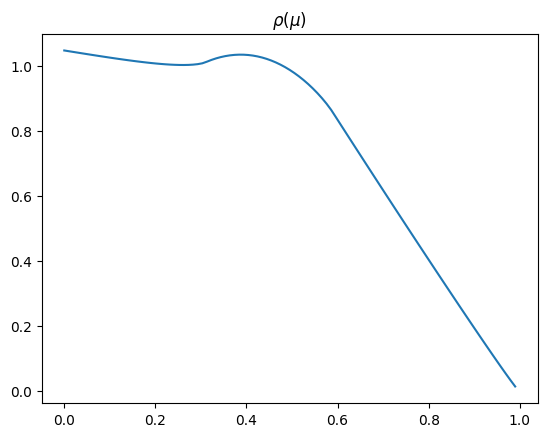

In [12]:
mus = np.linspace(0,1, 100)
rho_mu = get_mu_density(rho_exp_h)

dens_mu = [rho_mu(mu) for mu in mus]

plt.plot(mus, dens_mu)
plt.title(r"$\rho(\mu)$")

When looking at the sun/star from a angle.

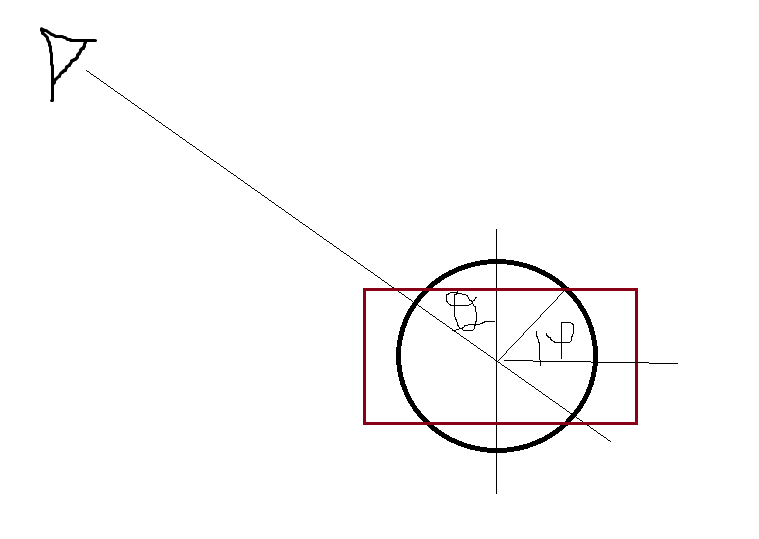

for $\theta=0°$ this is kinda straight forward: the inverse of before

Text(0.5, 1.0, '$\\rho(\\mu)$ seen from Northpole')

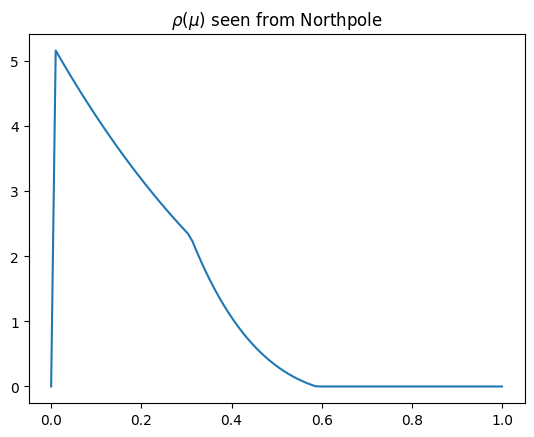

In [15]:
def get_mu_density_northpole(rho_h):
    
    def mu_dens(mu):
        r = np.arccos(mu)/np.pi*2
        h = (1-r**2)**0.5
        return 2 * np.pi * np.sin(r) * rho_h(h) * r ** 3
        
    return mu_dens

mus = np.linspace(0,1, 100)
rho_mu = get_mu_density_northpole(rho_exp_h)

dens_mu = [rho_mu(mu) for mu in mus]

plt.plot(mus, dens_mu)
plt.title(r"$\rho(\mu)$ seen from Northpole")

In [17]:
Normalization = quad(rho_mu, 0, 1)
Normalization

(1.3486914201260358, 9.192953509540303e-09)

In [1]:
import matplotlib.pyplot as plt
from sunpy.timeseries import TimeSeries
from sunpy.net import Fido, attrs as a

# Define the date range for the query
start_date = "2023-06-09 00:00"
end_date = "2023-06-09 23:59"

# Query GOES X-ray data using Fido
results = Fido.search(a.Time(start_date, end_date), a.Instrument("XRS"))

# Download the data
files = Fido.fetch(results)

# Ensure we handle multiple files correctly
goes_combined = TimeSeries(files, concatenate=True)  # Concatenate multiple files

# Extract time and X-ray flux data
time = goes_combined.index  # Time index
xrs_long = goes_combined.to_dataframe()['xrsb']  # Long channel: 0.1-0.8 nm

# Plot the data
plt.figure(figsize=(10, 6))
plt.semilogy(time, xrs_long, label="GOES 0.1-0.8 nm (XRS-B)", linewidth=1)

# Customize the plot
plt.title(f"GOES X-ray Flux ({start_date} to {end_date})")
plt.xlabel("Time (UTC)")
plt.ylabel("Flux (W/m²)")
#plt.yscale("log")  # X-ray flux is typically shown on a log scale
plt.legend()
plt.tight_layout()
plt.show()

Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

sci_xrsf-l2-flx1s_g16_d20230609_v2-2-0.nc:   0%|          | 0.00/4.99M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g18_d20230609_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230609_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g18_d20230609_v2-2-0.nc:   0%|          | 0.00/4.88M [00:00<?, ?B/s]

2024-12-18 15:04:55 - asyncio - ERROR: Exception in callback _ProactorBasePipeTransport._call_connection_lost(None)
handle: <Handle _ProactorBasePipeTransport._call_connection_lost(None)>
Traceback (most recent call last):
  File "c:\Users\Gebruiker\Anaconda3\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Gebruiker\Anaconda3\Lib\asyncio\proactor_events.py", line 165, in _call_connection_lost
    self._sock.shutdown(socket.SHUT_RDWR)
ConnectionResetError: [WinError 10054] De externe host heeft een verbinding verbroken
2024-12-18 15:04:56 - asyncio - ERROR: Exception in callback _ProactorBasePipeTransport._call_connection_lost(None)
handle: <Handle _ProactorBasePipeTransport._call_connection_lost(None)>
Traceback (most recent call last):
  File "c:\Users\Gebruiker\Anaconda3\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Gebruiker\Anaconda3\Lib\asyncio\proactor_event

AttributeError: 'XRSTimeSeries' object has no attribute 'index'